## Question 1: An airline tracks flight delays (in minutes) for 20 flights. Analyze the flight delays to calculate percentiles, detect outliers, and evaluate the overall distribution.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


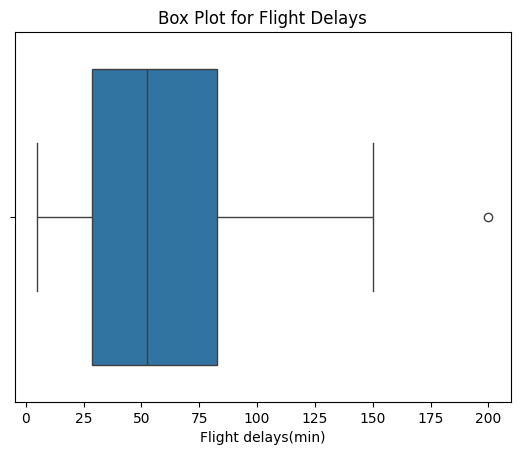

In [15]:
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]

percentile = np.percentile(delays,[10,25,50,75,90])

Q1,Q3 = percentile[1],percentile[3]

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in delays if x < lower_bound or x > upper_bound]

print("Percentiles (10th, 25th, 50th, 75th, 90th):",percentile)
print("IQR:",IQR)
print("Outliers:",outliers)

sns.boxplot(x=delays)
plt.xlabel("Flight delays(min)")
plt.title("Box Plot for Flight Delays")
plt.show()

## Question 2: A company wants to analyze the salary distribution of its employees to understand the central tendency and determine whether the data is skewed.

Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


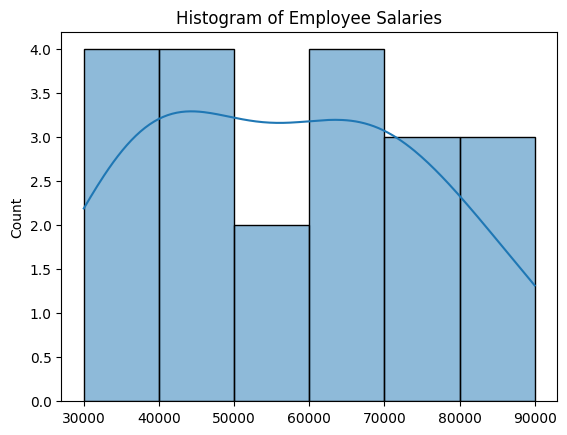

In [23]:
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]

mean_val= np.mean(salaries)
median_val=np.median(salaries)
mode_val=stats.mode(salaries,keepdims=True).mode[0]

print("Mean Salary:",mean_val)
print("Median Salary:",median_val)
print("Mode Salary:",mode_val)

if (mean_val > median_val):
    print("The data is Right Skewed (Positive Skew)")
elif (mean_val < median_val):
    print("The data is Left Skewed (Negative Skew)")
else:
    print("The data is Symmetrical")

sns.histplot(x=salaries,kde=True)
plt.title("Histogram of Employee Salaries")
plt.show()

## Question 3:A school wants to analyze the exam performance of students across three subjects: Mathematics, Science, and English. How can Data Science concepts be applied to understand their performance?

In [26]:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
df= pd.DataFrame(data)
df

,Student,Mathematics,Science,English
0,A,85,80,78
1,B,78,85,74
2,C,92,88,85
3,D,88,70,80
4,E,70,75,68
5,F,95,92,90
6,G,60,55,50
7,H,80,82,77
8,I,90,89,83
9,J,76,78,72


In [28]:
#Data Preprocessing
null_data= df.isnull().sum()
null_data

Student        0
Mathematics    0
Science        0
English        0
dtype: int64

The Descriptive Statistics:
        Mathematics    Science    English
count    10.000000  10.000000  10.000000
mean     81.400000  79.400000  75.700000
std      10.844353  10.895463  11.086027
min      60.000000  55.000000  50.000000
25%      76.500000  75.750000  72.500000
50%      82.500000  81.000000  77.500000
75%      89.500000  87.250000  82.250000
max      95.000000  92.000000  90.000000


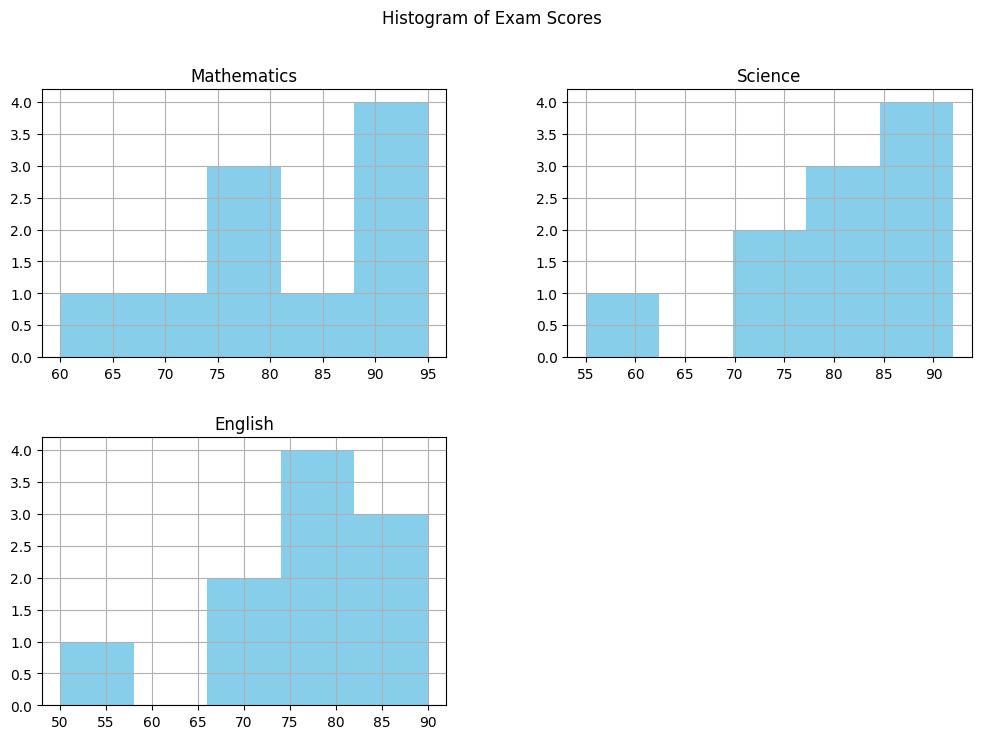


Correlation Matrix:
              Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


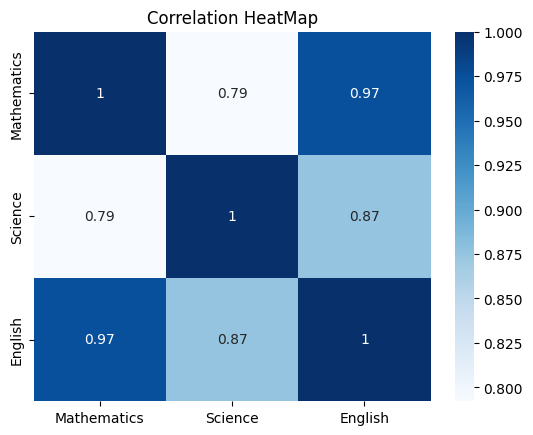

In [43]:
#Descriptive statistics
describe = df.describe()
print("The Descriptive Statistics:\n",describe)

#Histogram graph
df[['Mathematics','Science','English']].hist(bins=5, figsize=(12,8), color='skyblue')
plt.suptitle('Histogram of Exam Scores')
plt.show()

#Correlation Analysis
corr_matrix= df[['Mathematics','Science','English']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

#HeatMap graph
sns.heatmap(corr_matrix,cmap='Blues',annot=True)
plt.title("Correlation HeatMap")
plt.show()

## Question 4:A pharmaceutical company conducted a clinical trial with two groups: one receiving medication and the other a placebo. How do you perform a hypothesis test to determine the effectiveness of the medication?

In [47]:
from scipy.stats import ttest_ind

medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]

t_stats,p_value= stats.ttest_ind(medication_group,placebo_group)

print("T-Statistic:",t_stats)
print("P-Value:",p_value)

if(p_value <0.05):
    print("Rejects the null hypothesis: The medication is effective.")
else:
    print("Fails to reject the null hypothesie: There is no significant effect of medicine") 

T-Statistic: -9.201427649220966
P-Value: 3.163912817600812e-08
Rejects the null hypothesis: The medication is effective.


## Question 5 : A company conducted a customer satisfaction survey where customers rated their experience on a scale of 1 to 10. Analyze the survey results to calculate descriptive statistics and visualize the distribution of customer satisfaction ratings.

Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298


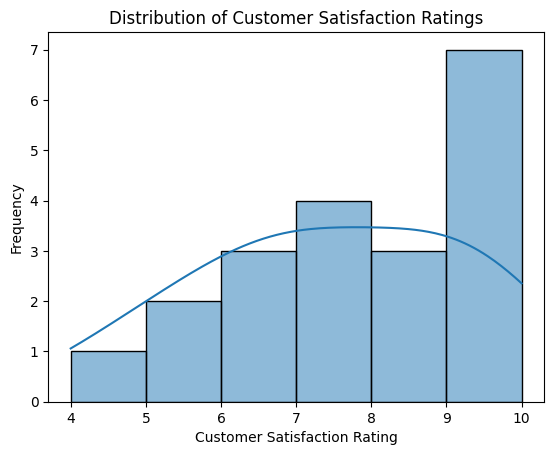

In [55]:
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
mean_val= np.mean(ratings)
median_val= np.median(ratings)
mode_val= stats.mode(ratings, keepdims=True).mode[0]
std_val = np.std(ratings)

print("Mean Rating:",mean_val)
print("Median Rating:",median_val)
print("Mode Rating:",mode_val)
print("Standard Deviation:",std_val)

sns.histplot(x=ratings,kde=True)
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel("Frequency")
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()